## Introduction to the dataset

- World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases.

- Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 

- The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

- This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.


In [59]:
import pandas as pd
from collections import Counter
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.tools import add_constant as ac
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,  mean_squared_error, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer
sc = StandardScaler()
le = LabelEncoder()

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
rfr = RandomForestRegressor()
rfc = RandomForestClassifier()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Test
dfp = pd.read_csv('US_Heart_Patients.csv')
dfp.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
dfp.shape

(4240, 16)

In [4]:
target_var = 'TenYearCHD'

In [5]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [6]:
def cm_data(cm):
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    print("Sensitivity: ", tp/(tp+fn))
    print("Specificity: ",tn/(tn+fp))
    print("Precision: ", tp/(tp+fp))
    print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))

In [7]:
def check_accuracy(test, pred, conf_mat = 'no'):
    acc = accuracy_score(test, pred)
    if conf_mat == 'yes':
        cm = confusion_matrix(test, pred)
        cm_df = pd.DataFrame(cm, columns=['Pred: 0', 'Pred: 1'], index = ['Obs: 0', 'Obs: 1'])
        # plt.figure(figsize=(10, 10))
        sns.heatmap(cm_df, annot=True, fmt='d')
        plt.show()
        cm_data(cm)
    return acc
    

In [8]:
# # After the above function has run this function would be called and it would 
# # print all accuracies along with the best one.

# def print_best(name, x):
#     print("No Sampling Done  :", x['not'])
#     print("Over              :", x['o'])
#     print("Under             :", x['u'])
#     print("Both              :", x['b'])

#     code = {
#         'not': 'No Sampling Done',
#         'o': 'SMOTE',
#         'u': 'NearMiss',
#         'b': 'SMOTE and Then NearMiss'
#     }
#     print("\nBest way in {} model is:".format(str(name)[:-2]), code[max(zip(x.values(), x.keys()))[1]])

In [9]:
# # Purpose of the function is to determine which balancing technique is working the best.
# # If we find one we would then rerun the function with that accuracy.

# def all_samp_acc(model, params, df, cm = 'no'):

#     if cm == 'yes':
#         print("No Sampling: ")        
#     _, no_samp_acc = grid_search(model = model, params = params, df = df, encod = 'd', cm=cm)
    
#     if cm == 'yes':
#         print("SMOTE: ")
#     _, over_samp_acc = grid_search(model = model, params = params, df = df, samp = 'o', encod = 'd', cm=cm)
    
#     if cm == 'yes':
#         print("NearMiss: ")
#     _, under_samp_acc = grid_search(model = model, params = params, df = df, samp = 'u', encod = 'd', cm=cm)
    
#     if cm == 'yes':
#         print("Both: ")
#     _, both_samp_acc = grid_search(model = model, params = params, df = df, samp = 'b', encod = 'd', cm=cm)
    
#     acc = {
#     'not': no_samp_acc,
#     'o': over_samp_acc,
#     'u': under_samp_acc,
#     'b': both_samp_acc
#     }
#     print_best(model, acc)  

In [10]:
# Check Multicollinearilty

def check_multicol(x):
    plt.figure(figsize=(20, 10))
    sns.heatmap(x.corr(), annot=True)
    plt.show()

In [11]:
# Implementing SMOTE

def smote(x, y):
    oversample = SMOTE(random_state = 2, sampling_strategy='minority')
    x = x.values
    y = y.values
    x, y = oversample.fit_resample(x, y)
    return x, y

In [12]:
# Implementing NearMiss

def near_miss(x, y):
    nr = NearMiss() 
    x_near, y_near= nr.fit_resample(x, y)
    return x_near, y_near

In [13]:
def grid_search(model, params, df, encod = 'd', samp = None, cm = 'no'):

    x = df.loc[:, df.columns != target_var]
    y = df.loc[:, target_var]

    if encod == 'l':
        x = x.apply(LabelEncoder().fit_transform)
        x = x.apply(LabelEncoder().transform)
    else:
        x = pd.get_dummies(x, drop_first=True)
        x = pd.get_dummies(x, drop_first=True)
    
    if samp != None:
        if samp == 'o':
            x, y = smote(x, y)
        elif samp == 'u':
            x, y = near_miss(x, y)
        elif samp == 'b':
            x, y = smote(x, y)
            x, y = near_miss(x, y)
    
    x = pd.DataFrame(x)
    y = pd.DataFrame(y, columns=['TenYearCHD'])
    
    x_train, x_test, y_train, y_test = split_data(pd.concat([x, y], axis=1))

    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    grid_mod = GridSearchCV(model, param_grid=params, scoring = ['accuracy', 'f1'], cv = 10, n_jobs=-1, refit='accuracy')
    
    grid_mod.fit(x_train, y_train)

    y_pred = grid_mod.predict(x_test)

    if cm == 'yes':
        acc = check_accuracy(y_test, y_pred, conf_mat = 'yes')

    return grid_mod.best_estimator_, acc

In [14]:
def split_data(df, y = target_var):
    x = df.loc[:, df.columns != y]
    y = df.loc[:, y]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
    # x_train, x_val, y_train, y_val =  train_test_split(x_train, y_train, test_size = 0.2, random_state = 123)

    return x_train, x_test, y_train, y_test

###  EDA and Feature Engineering

#### Univariate Analysis

In [15]:
# Caonverting object and numerical to category

to_be_cat = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
dfp[to_be_cat]= dfp[to_be_cat].astype('category')
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4240 non-null   category
 1   age              4240 non-null   int64   
 2   education        4135 non-null   category
 3   currentSmoker    4240 non-null   category
 4   cigsPerDay       4211 non-null   float64 
 5   BPMeds           4187 non-null   category
 6   prevalentStroke  4240 non-null   category
 7   prevalentHyp     4240 non-null   category
 8   diabetes         4240 non-null   category
 9   totChol          4190 non-null   float64 
 10  sysBP            4240 non-null   float64 
 11  diaBP            4240 non-null   float64 
 12  BMI              4221 non-null   float64 
 13  heartRate        4239 non-null   float64 
 14  glucose          3852 non-null   float64 
 15  TenYearCHD       4240 non-null   category
dtypes: category(8), float64(7), int64(1)
memor

In [16]:
not_to_plot = [] # contains column names which are not to be plotted. In this case we have none.
rand_color = ['red', 'blue', 'green']

In [17]:
def univariate(df, rows = 4, cols = 4):
    fig=plt.figure(figsize=(20,20))
    for j, i in enumerate(df.columns):
        ax=fig.add_subplot(rows,cols,j+1)
        if i in df.select_dtypes(['category']):
            sns.countplot(x= i, data = df, ax=ax)
        if i in df.select_dtypes(['int', 'float64']):
            sns.distplot(x = df[i], ax=ax, color=np.random.choice(rand_color))
    fig.tight_layout() 
    plt.show()

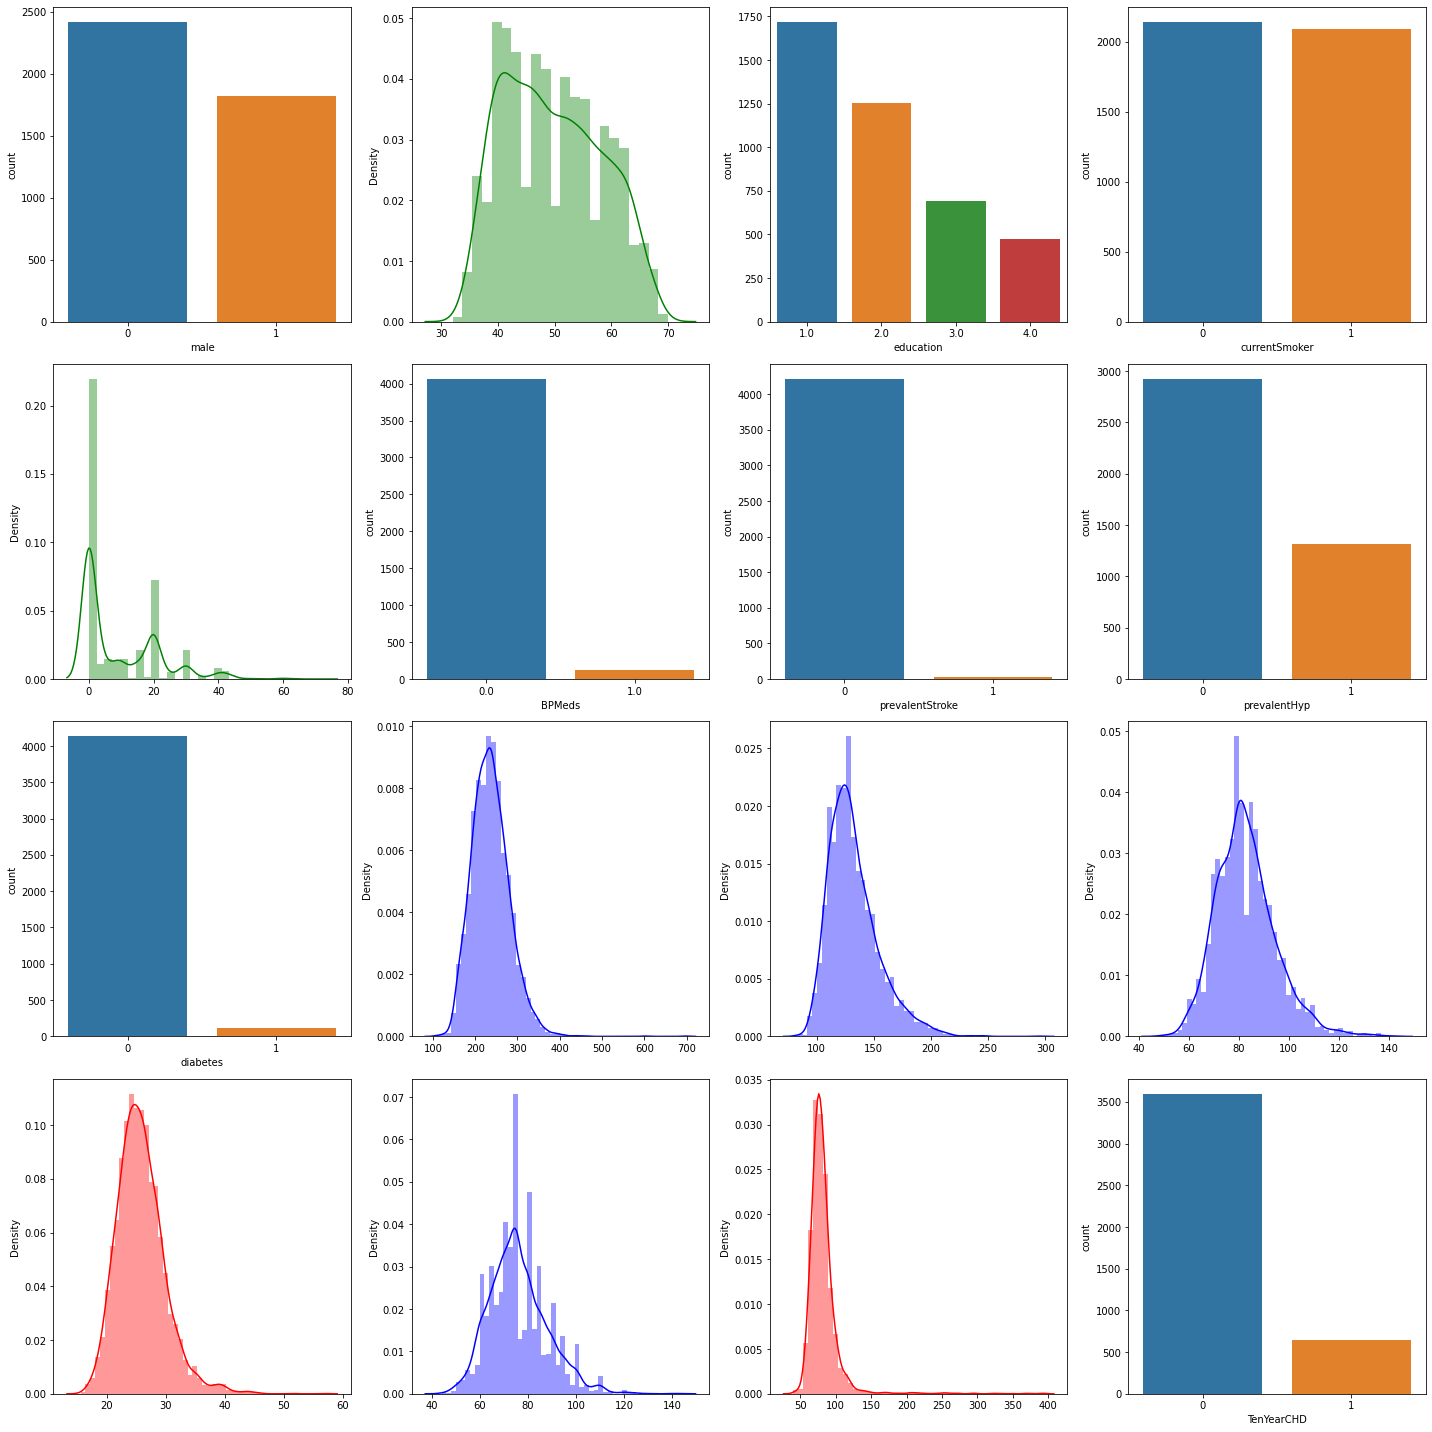

In [18]:
univariate(dfp)

#### Bivariate Analysis

In [19]:
def bivariate(df = dfp, y = target_var, cols = 4, rows = 4):
    temp = not_to_plot[:]
    temp.append(y)
    fig=plt.figure(figsize=(25,20))

    for j, i in enumerate(df.columns):
        if df[y].dtype == 'float':
            if i in df.select_dtypes(['category']):
                if (i not in temp): 
                    ax=fig.add_subplot(rows,cols,j+1)
                    sns.boxplot(x = i, y = y, data = df)

            if i in df.select_dtypes(['float', 'int']):                
                if (i not in temp):      
                    ax=fig.add_subplot(rows,cols,j+1)       
                    sns.scatterplot(x = y, y = i, data = df)                  
            
        elif df[y].dtype == 'category':
            if i in df.select_dtypes(['category']):
                if (i not in temp):
                    ax=fig.add_subplot(rows,cols,j+1)
                    sns.countplot(x = i, hue = y, data = df)
                    plt.legend(bbox_to_anchor=(1, 1), loc=2, labels=['Not Survived', 'Survived'], borderaxespad=0.)

            if i in df.select_dtypes(['float', 'int']):
                if (i not in temp):
                    ax=fig.add_subplot(rows,cols,j+1)
                    sns.boxplot(x = y, y = i, data = df)
    fig.tight_layout() 
    plt.show()

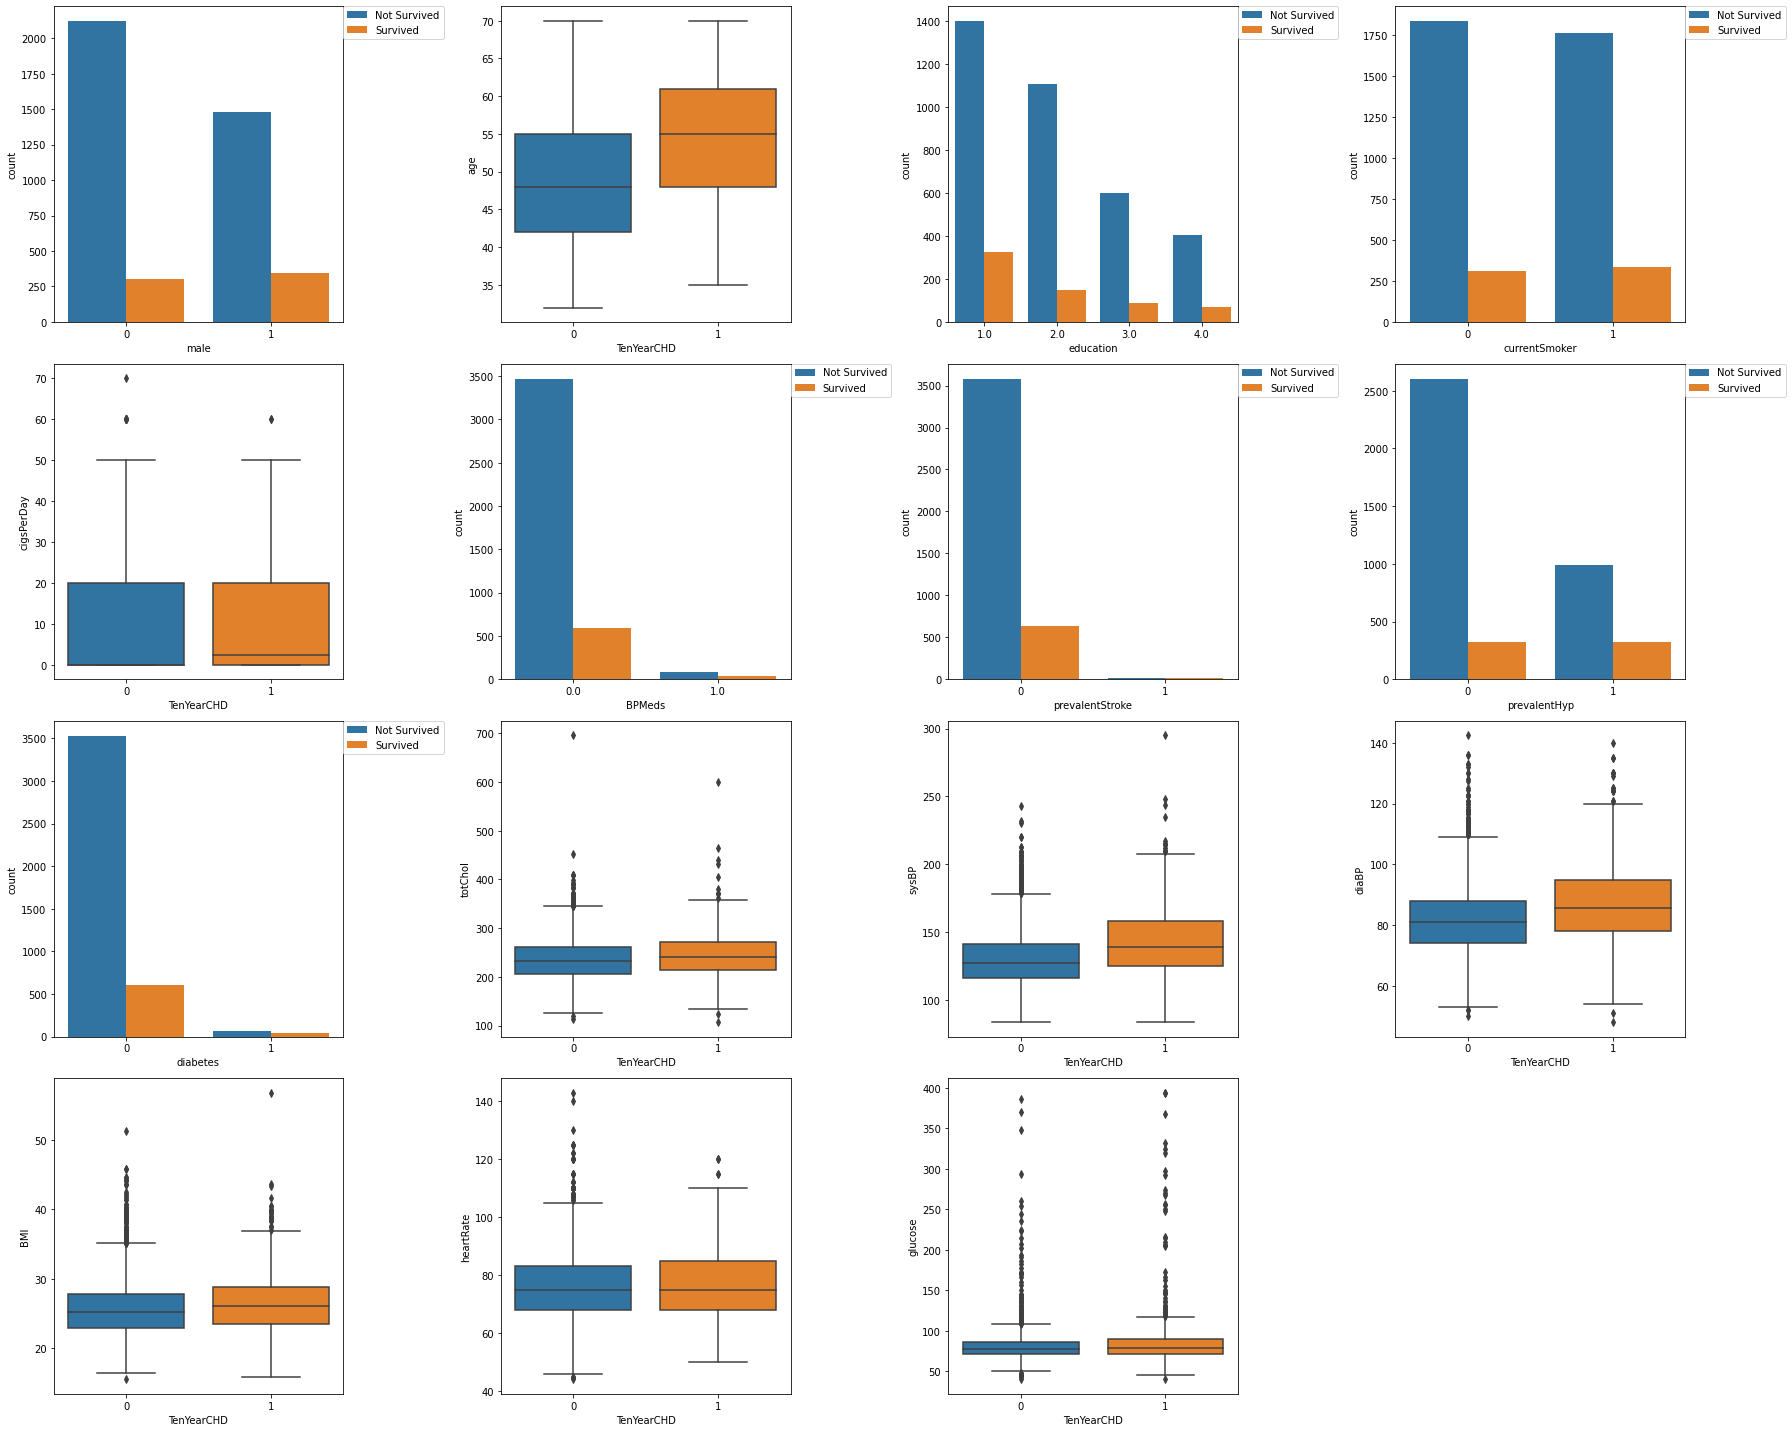

In [20]:
bivariate()

#### Missing Values

In [21]:
dfp.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
# % of all missing var
miss_df = pd.DataFrame(dfp.isnull().sum(), columns=['Miss_Values'])
for i in miss_df.index:
    val = miss_df._get_value(i, miss_df.columns[0]) 
    if val > 0:
        print(i, "% : ", val*100/dfp.shape[0])

education % :  2.4764150943396226
cigsPerDay % :  0.6839622641509434
BPMeds % :  1.25
totChol % :  1.179245283018868
BMI % :  0.4481132075471698
heartRate % :  0.02358490566037736
glucose % :  9.150943396226415


In [23]:
# Case 1: Drop All Null Values.
dfp.dropna(inplace=True)
dfp.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [24]:
dfp.TenYearCHD = le.fit_transform(dfp.TenYearCHD)
dfp.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             3658 non-null   category
 1   age              3658 non-null   int64   
 2   education        3658 non-null   category
 3   currentSmoker    3658 non-null   category
 4   cigsPerDay       3658 non-null   float64 
 5   BPMeds           3658 non-null   category
 6   prevalentStroke  3658 non-null   category
 7   prevalentHyp     3658 non-null   category
 8   diabetes         3658 non-null   category
 9   totChol          3658 non-null   float64 
 10  sysBP            3658 non-null   float64 
 11  diaBP            3658 non-null   float64 
 12  BMI              3658 non-null   float64 
 13  heartRate        3658 non-null   float64 
 14  glucose          3658 non-null   float64 
 15  TenYearCHD       3658 non-null   int64   
dtypes: category(7), float64(7), int64(2)
memor

#### Model Building

##### 1. Logistic Regression

In [28]:
x = dfp.loc[:, dfp.columns != target_var]
y = dfp.loc[:, target_var]

x = x.apply(LabelEncoder().fit_transform)

model = sm.Logit(y, ac(x))
res = model.fit()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.377227
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                  0.1158
Time:                        16:21:52   Log-Likelihood:                -1379.9
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 8.668e-68
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.5825      0.294    -15.571      0.000      -5.159      -4.006
male          

In [30]:
# Removing cols with p-value more than 0.05

def back_feat_elem(df = dfp, y = target_var):
    x = df.loc[:, df.columns != y]
    y = df.loc[:, y]

    x = x.apply(LabelEncoder().fit_transform)

    col = x.columns

    while len(col) > 0:
        model = sm.Logit(y, ac(x[col]))
        result = model.fit(disp= 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col = col.drop(largest_pvalue.index)  

In [31]:
back_res = back_feat_elem()
back_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3652
Method:                           MLE   Df Model:                            5
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                  0.1119
Time:                        16:22:01   Log-Likelihood:                -1385.9
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.417e-73
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7474      0.201    -23.649      0.000      -5.141      -4.354
male           0.5235      0.105      4.976      0.000       0.317       0.730
age            0.0678      0.006     10.591      0.000       0.055       0.080
cigsPerDay     0.0255      0.005      4.803      0.000       0.015       0.036
sysBP          0.0096      0.001      8.440      0.000       0.007       0.012
glucose        0.0097      0.003      3.750      0.000       0.005       0.015
==============================================================================
"""

In [32]:
ind = list(back_res.params.index)
ind.remove('const')
# To Insert Imp Cols that I like.
# ind.extend([''])
ind

['male', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [33]:
new_x = dfp[ind]
new_y = dfp.TenYearCHD
new_df = pd.concat([new_x,new_y], axis=1)
new_df.head()

,male,age,cigsPerDay,sysBP,glucose,TenYearCHD
0,1,39,0.0,106.0,77.0,0
1,0,46,0.0,121.0,76.0,0
2,1,48,20.0,127.5,70.0,0
3,0,61,30.0,150.0,103.0,1
4,0,46,23.0,130.0,85.0,0


In [ ]:
params_lg = {
    'penalty': ['l1', 'l2','elasticnet'],
    'tol': [0.1, 0.01],
    'C': [0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 100],
    'multi_class': ['auto', 'ovr','multinomial'],
    'n_jobs': [3,4],
}

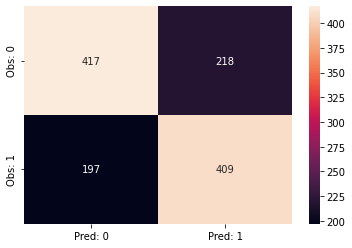

Sensitivity:  0.6749174917491749
Specificity:  0.6566929133858268
Precision:  0.6523125996810207
Accuracy:  0.6655922643029815


In [34]:
mod_lg_o, acc_lg_o = grid_search(model = LogisticRegression(), params =  params_lg, samp='o', df = dfp, cm='yes')

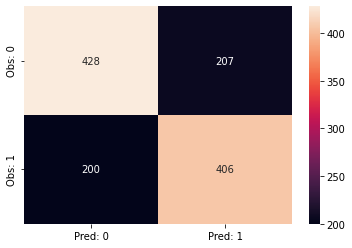

Sensitivity:  0.66996699669967
Specificity:  0.6740157480314961
Precision:  0.6623164763458401
Accuracy:  0.6720386784850927


In [35]:
mod_lg_n, acc_lg_n = grid_search(model = LogisticRegression(), params =  params_lg, samp='o', df = new_df, cm='yes')

The Accuracy is very low, So lets try other models.

##### 2: Decision Tree Classifier

In [36]:
new_df.TenYearCHD = new_df.TenYearCHD.astype('category')
new_df.TenYearCHD.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [37]:
params_dt = {
    'criterion': ['gini','entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 6, 9],
    'min_samples_leaf': [5, 8, 11],
    'max_features': ['sqrt', 'log2'],
}

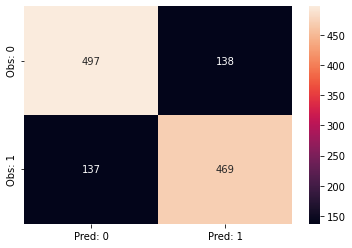

Sensitivity:  0.7739273927392739
Specificity:  0.7826771653543307
Precision:  0.7726523887973641
Accuracy:  0.7784045124899275


In [38]:
mod_dt_o, acc_dt_o = grid_search(model = DecisionTreeClassifier(), params = params_dt, samp = 'o', df = dfp, cm='yes')

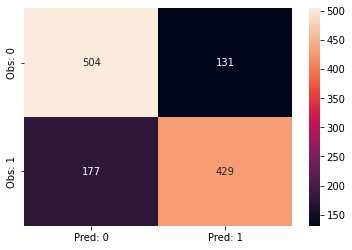

Sensitivity:  0.7079207920792079
Specificity:  0.7937007874015748
Precision:  0.7660714285714286
Accuracy:  0.7518130539887188


In [39]:
mod_dt_n, acc_dt_n = grid_search(model = DecisionTreeClassifier(), params = params_dt, df = new_df, samp = 'o', cm='yes')

##### 3: KNN Classification

In [40]:
params_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'n_jobs': [-1],
    'p':[0,1,2,i]
}

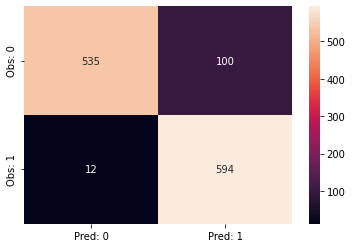

Sensitivity:  0.9801980198019802
Specificity:  0.84251968503937
Precision:  0.8559077809798271
Accuracy:  0.9097502014504432


In [41]:
mod_knn_o, acc_knn_o = grid_search(model = KNeighborsClassifier(), params = params_knn, df = dfp, cm='yes', samp = 'o')

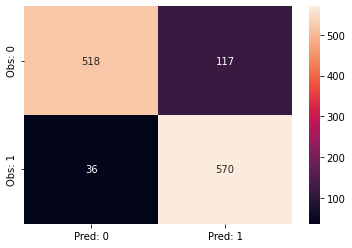

Sensitivity:  0.9405940594059405
Specificity:  0.815748031496063
Precision:  0.8296943231441049
Accuracy:  0.8767123287671232


In [42]:
mod_knn_n, acc_knn_n = grid_search(model = KNeighborsClassifier(), params = params_knn, df = new_df, cm='yes', samp = 'o')

##### 4: SVC

In [43]:
params_svc = {
    'C': [0.1, 1, 10, 15, 20],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo','ovr']
}

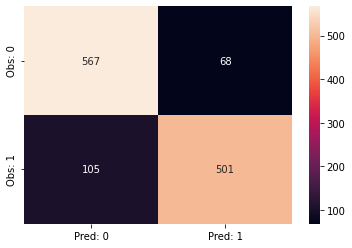

Sensitivity:  0.8267326732673267
Specificity:  0.8929133858267716
Precision:  0.8804920913884007
Accuracy:  0.8605962933118453


In [44]:
mod_svc_o, svc_acc_o = grid_search(model = SVC(), params = params_svc, samp = 'o', df = dfp, encod= 'd', cm='yes')

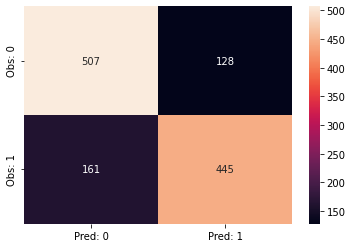

Sensitivity:  0.7343234323432343
Specificity:  0.7984251968503937
Precision:  0.7766143106457243
Accuracy:  0.7671232876712328


In [45]:
mod_svc_n, svc_acc_n = grid_search(model = SVC(), params = params_svc, samp = 'o', df = new_df, encod= 'd', cm='yes')

##### 5: Neural Networks

In [46]:
# To be done in the future

##### 6: Complex SVM

In [47]:
# To be done in the future

##### 7: Complex Neural Networks 

In [48]:
# To be done in the future

##### 8: Random Forest Classifier

Using GridSearchCV for Random Forest Classifier

In [49]:
rf_params = {
    'n_estimators': [10, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, 20, 25, 40],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True],
    'n_jobs': [3],
}

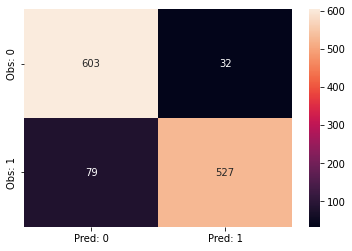

Sensitivity:  0.8696369636963697
Specificity:  0.9496062992125984
Precision:  0.9427549194991055
Accuracy:  0.9105560032232071


In [50]:
model_rf_o, acc_rf_o = grid_search(model=RandomForestClassifier(), params=rf_params, df = dfp, samp='o', cm='yes')

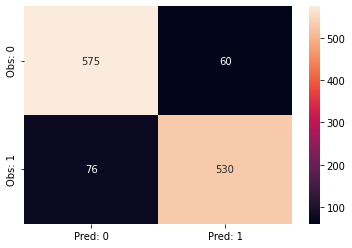

Sensitivity:  0.8745874587458746
Specificity:  0.905511811023622
Precision:  0.8983050847457628
Accuracy:  0.8904109589041096


In [52]:
model_rf_n, acc_rf_n = grid_search(model=RandomForestClassifier(), params=rf_params, df = new_df, samp='o', cm='yes')

In Random Forest, the old DataFrame (dfp) is slightly better than the new one.

##### 9: BaggingClassifier

In [54]:
new_models = [mod_dt_n, mod_knn_n, mod_lg_n, mod_svc_n, model_rf_n]
old_models = [mod_dt_o, mod_knn_o, mod_lg_o, mod_svc_o, model_rf_o]

In [60]:
params_bg_o = {
    'base_estimator': old_models,
    'n_estimators': [10, 20, 30, 40, 50],
    'n_jobs':[-1]
}

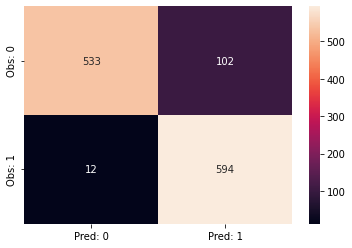

Sensitivity:  0.9801980198019802
Specificity:  0.8393700787401575
Precision:  0.853448275862069
Accuracy:  0.9081385979049154


In [61]:
mod_bg_o, acc_bg_o = grid_search(model = BaggingClassifier(), params = params_bg_o, df = dfp, encod = 'd', cm='yes', samp = 'o')

In [62]:
params_bg_n = {
    'base_estimator': new_models,
    'n_estimators': [10, 20, 30, 40, 50],
    'n_jobs':[-1]
}

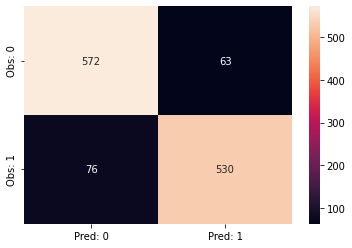

Sensitivity:  0.8745874587458746
Specificity:  0.9007874015748032
Precision:  0.893760539629005
Accuracy:  0.8879935535858179


In [63]:
mod_bg_n, acc_bg_n = grid_search(model = BaggingClassifier(), params = params_bg_n, df = new_df, encod = 'd', cm='yes', samp='o')